In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

# it is allready organised for us in train & test data 
(X_train,y_train),(X_test, y_test) = mnist.load_data() #use to load data

In [3]:
# Explain shape of that and how to visualize the data

X_train.shape # there are 60K image with 28 by 28 pixels

(60000, 28, 28)

In [4]:
single_image = X_train[0]

In [5]:
single_image.shape

(28, 28)

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

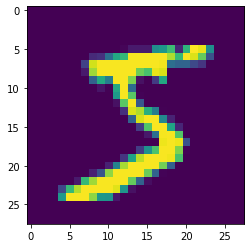

In [7]:
plt.imshow(single_image) # they are grey scale which means the values goes from 0-255

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

###### if you notice that the array right now has it's very first value as 5. Right now our labels are the number which they represent & what's going to happen here is if we have to passing our training labels as such the network would have assumed some sort of continuse value & it would try to predict stuff like 5.5 or any other float value & really these are categories so ... 5 IS NOT A CONTINUOUS VALUE IT IS ACTUALLY CATEGORY 5... so actually we are doing here is the classification problem ... So we have to use one-hot encoding 

In [9]:
# one hot encode using tensorflow 

from tensorflow.keras.utils import to_categorical

print("Before using the function :",y_train.shape)

y_example = to_categorical(y_train)      # converts class vector int to binary class matrix

print("After using the function :",y_example.shape)

Before using the function : (60000,)
After using the function : (60000, 10)


In [10]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
# Now we will convert both test label & the train label into categorical labels

y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_train = to_categorical(y_train,10)

In [12]:
# Normalize the Training Data : meaning bring that values between 0-1


# DO ONLY WHEN YOU KNOW THE FIX RANGE .....ELSE USE MINMAXSCALER

X_train = X_train/255
X_test = X_test/255

In [13]:
scaled_img = X_train[0]

In [14]:
scaled_img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
scaled_img.max()

1.0

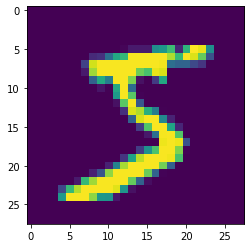

In [16]:
plt.imshow(scaled_img)

In [17]:
# Reshape the data

# This is import to let the network know that we are dealing with a single RGB channel

X_train = X_train.reshape(60000,28,28,1) # batch_size, width, height, color_channes

X_test = X_test.reshape(10000,28,28,1)

In [18]:
# Training & Creating a model


# Conc2D    : Handle 2D images
# MaxPool2d : 
# Flatten   : We have to faltten out this images to fit it into our final Dense layer 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),
                 input_shape=(28,28,1),
                 activation="relu",padding="same")) # padding="same" <== automatically figure out the padding
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten()) # Flatten img : 28*28 = 784 

model.add(Dense(128,activation="relu"))

# output layer (1 neuron per class)

model.add(Dense(10,activation='softmax')) # Softmax bcz it is a Multi-class problem

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy']) # keras.io/metrics

In [19]:
# Training model

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [20]:
model.fit(X_train,y_cat_train,epochs=10,
          validation_data=(X_test,y_cat_test),
          callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 688us/sample - loss: 0.1439 - accuracy: 0.9567 - val_loss: 0.0509 - val_accuracy: 0.9820
Epoch 2/10
60000/60000 [==============================] - 40s 663us/sample - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0567 - val_accuracy: 0.9816


In [21]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.143903,0.956667,0.050938,0.9820
1,0.047247,0.985350,0.056691,0.9816


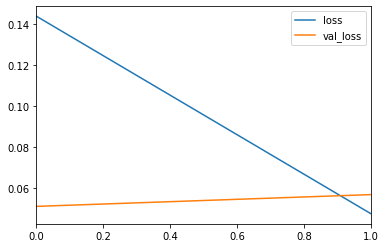

In [22]:
metrics[['loss','val_loss']].plot()

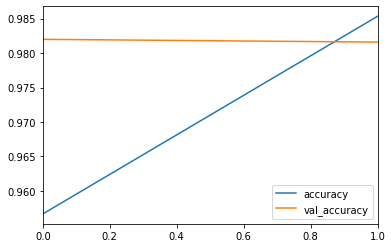

In [23]:
metrics[['accuracy','val_accuracy']].plot()

In [24]:
model.metrics_names

['loss', 'accuracy']

In [25]:
# If we want to get actual matrix of these loss or accuracy on any set of data 

model.evaluate(X_test,y_cat_test,verbose=0)

[0.056691196184325963, 0.9816]

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

predict = model.predict_classes(X_test)

y_cat_test.shape

(10000, 10)

In [27]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.97      0.98      1032
           3       0.94      1.00      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       1.00      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [28]:
print(confusion_matrix(y_test,predict))

[[ 976    1    0    1    0    0    1    0    1    0]
 [   0 1133    0    2    0    0    0    0    0    0]
 [   0    7  998   18    2    0    0    3    4    0]
 [   0    0    0 1009    0    1    0    0    0    0]
 [   1    0    0    0  952    0    1    3    8   17]
 [   1    0    0   16    0  873    1    0    1    0]
 [   9    4    0    3    1    5  927    0    9    0]
 [   0    2    5    7    0    0    0 1010    1    3]
 [   2    0    0   12    0    1    0    1  955    3]
 [   1    2    0    7    5    3    0    6    2  983]]


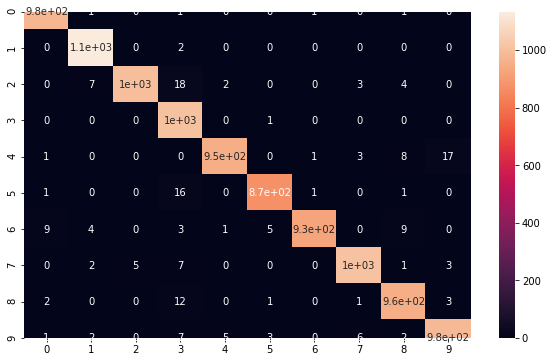

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)

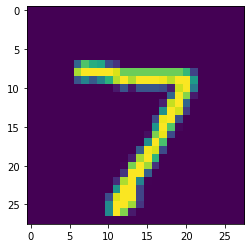

In [31]:
# How to predict a single Image

my_num = X_test[0]

plt.imshow(my_num.reshape(28,28))

In [32]:
# Here the shape should be end up by being batch size 

model.predict_classes(my_num.reshape(1,28,28,1)) # batch_size, width, height, color_channes

array([7], dtype=int64)